In [1]:
import itk
import numpy as np
import struct
import matplotlib.pyplot as plt
from itkwidgets import view

In [2]:
with open('bmall.dat', mode='rb') as file:
    fileContent = file.read()

In [3]:
dt = np.dtype(np.float32)
#dt = dt.newbyteorder('<')
data_1d = np.frombuffer(fileContent, dtype=dt)

In [4]:
data_raw = np.reshape(data_1d, [92,200,153,102], order='C')

In [5]:
data = np.transpose(data_raw, (1,3,0,2))

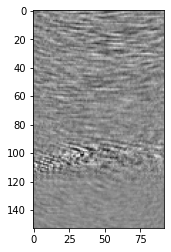

In [6]:
plt.imshow(np.rot90(data[1,10,:,:]),"gray")

In [7]:
view(data[1,:,:,:])

<IPython.core.display.Javascript object>

In [23]:
img_pre = []
for d in range(data.shape[0]):
    img = itk.GetImageFromArray(data[d])
    img_med = itk.MedianImageFilter(Input=img,Radius=3)
    img_blur = itk.SmoothingRecursiveGaussianImageFilter(Input=img_med,Sigma=3)
    img_pre.append(img_blur)

In [24]:
view(img_pre[0])

<IPython.core.display.Javascript object>

In [25]:
data_pre = np.empty(data.shape)
for d in range(len(img_pre)):
    data_pre[d,:,:,:] = itk.GetArrayFromImage(img_pre[d])

In [ ]:
fixed_id = 0
moving_id = 50

In [26]:
data_diff = data_pre[fixed_id] - data_pre[moving_id] 


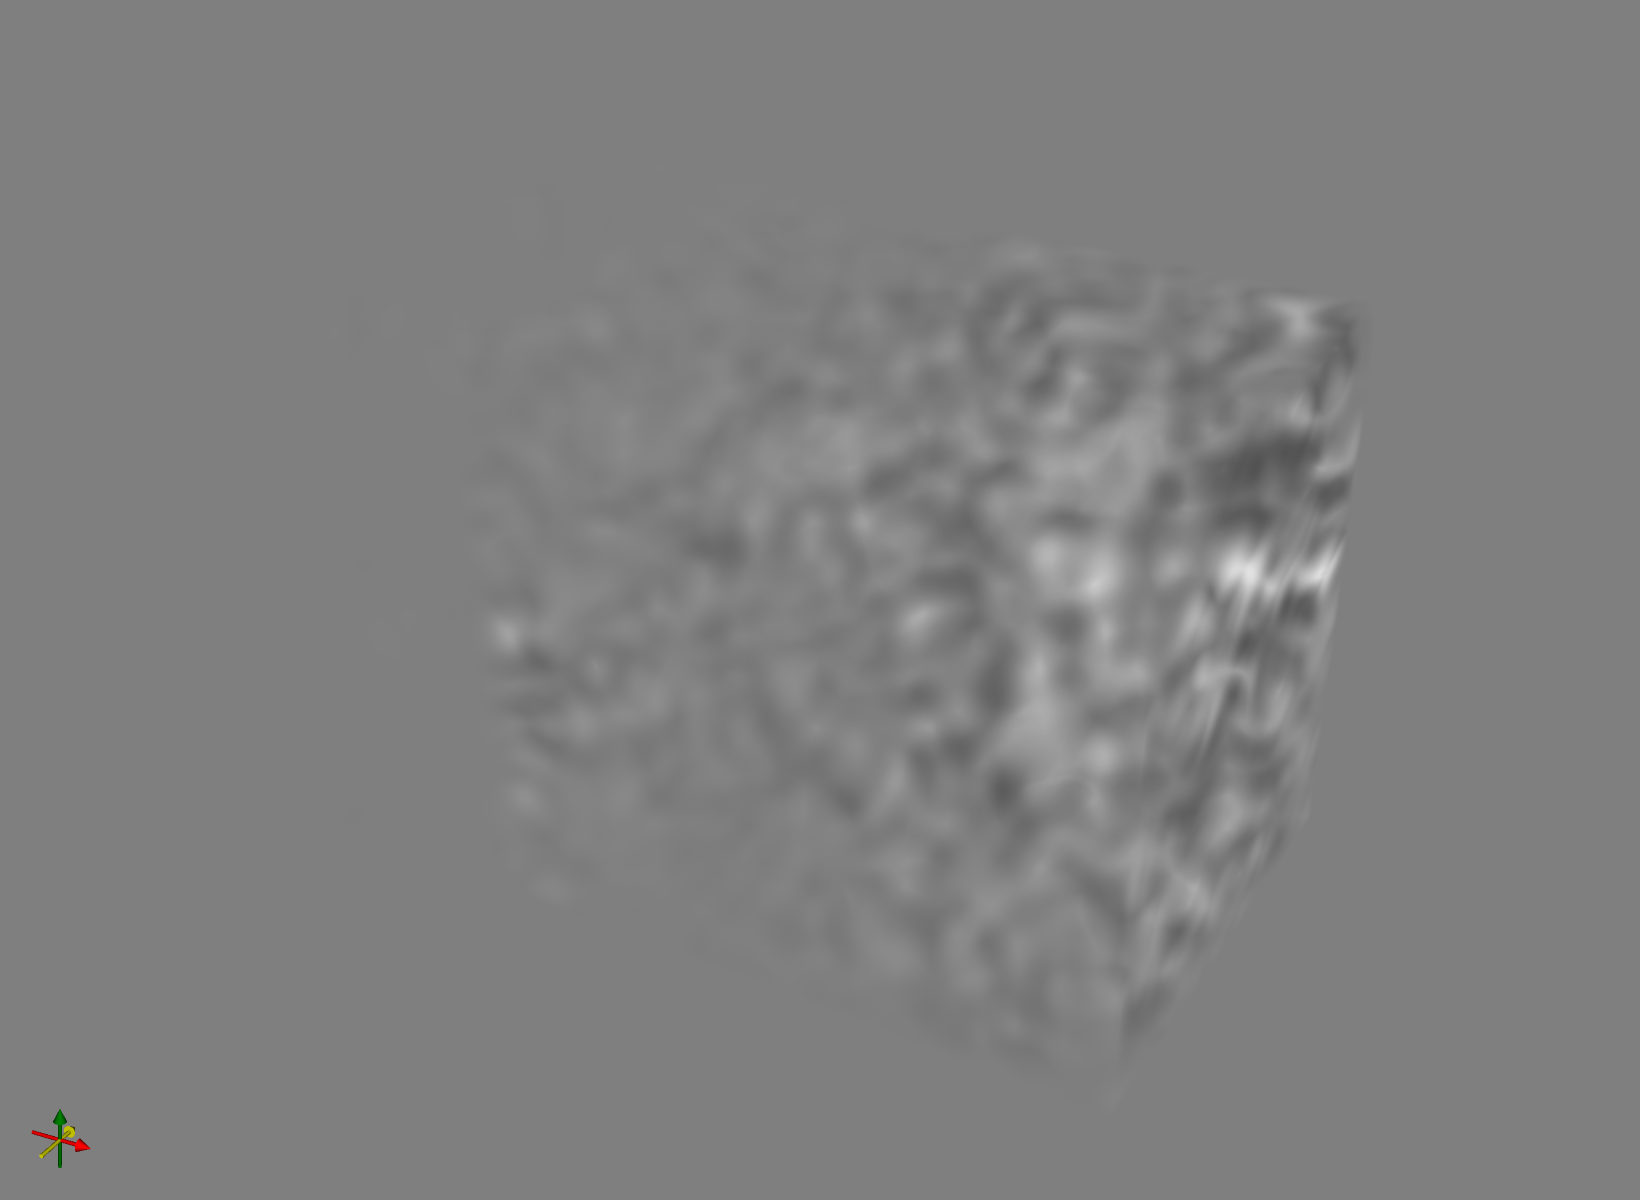
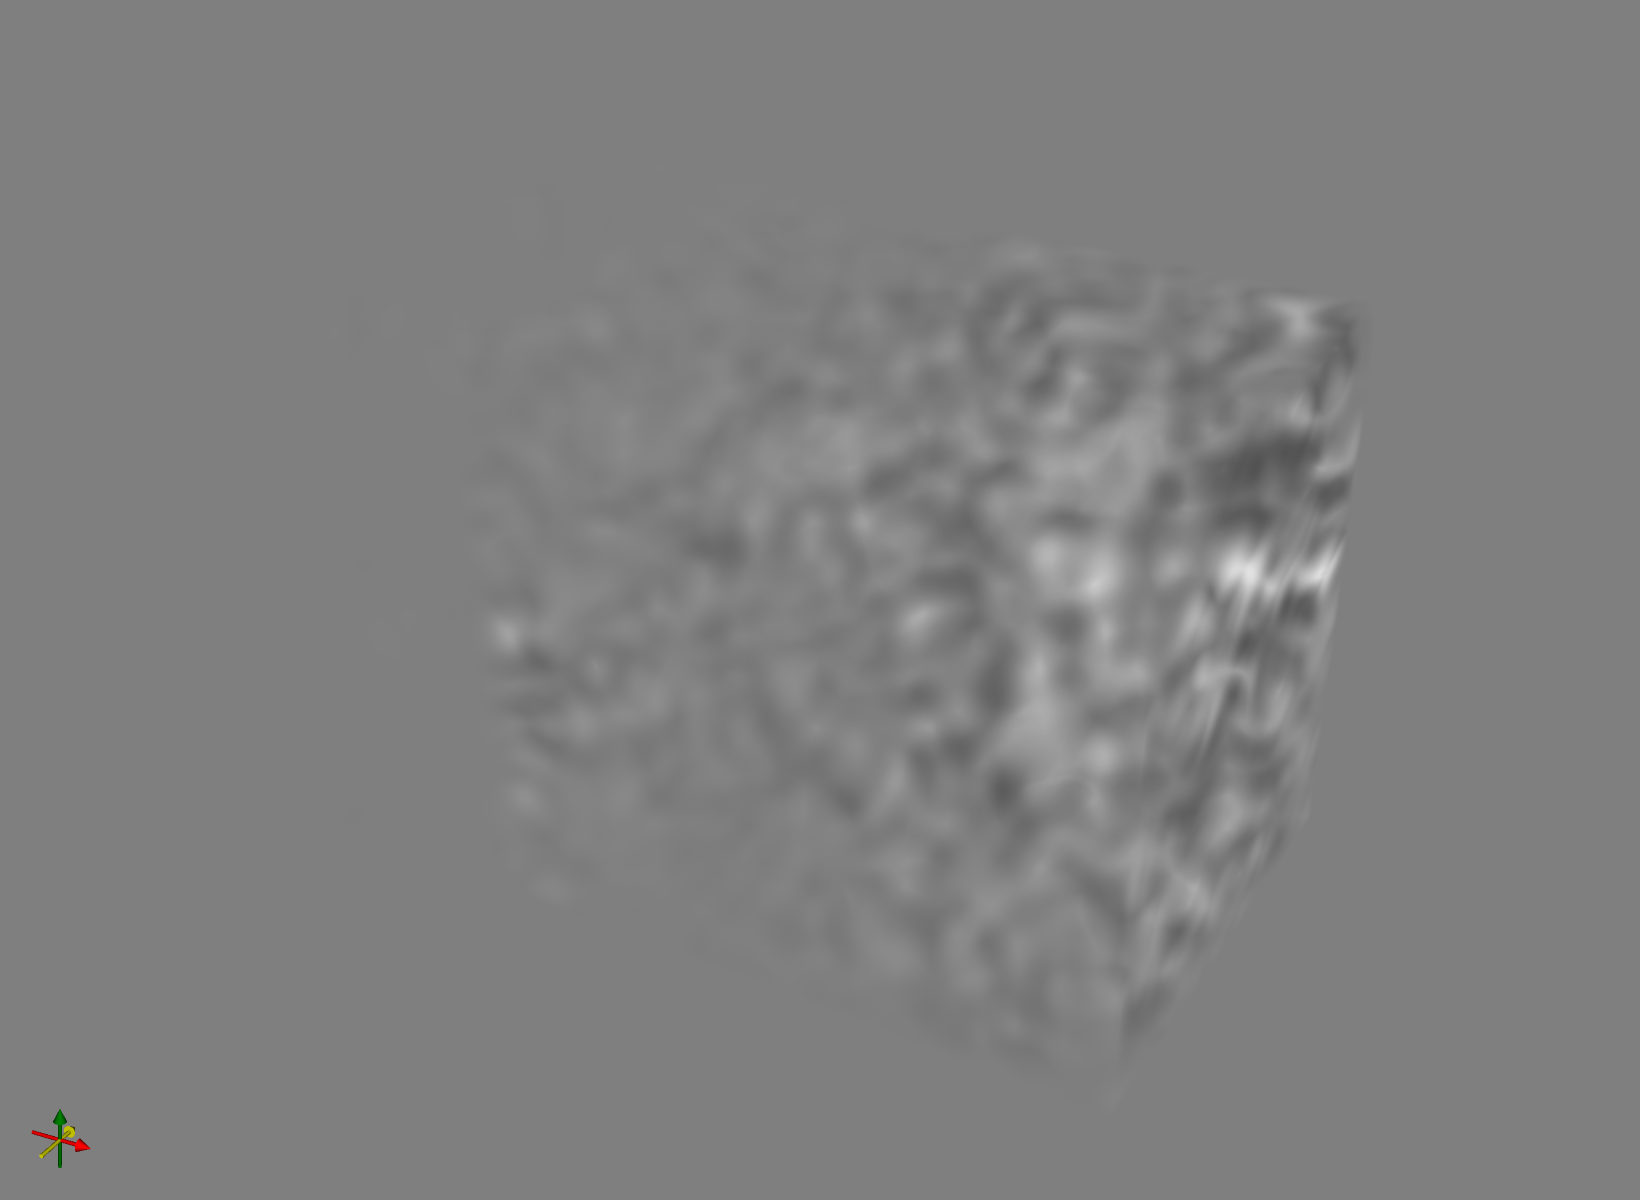

<IPython.core.display.Javascript object>

In [36]:
view(data_diff)

In [28]:
print(data_diff.min(), data_diff.max())

-1656.38134765625 1226.0732421875


In [29]:
parameter_object = itk.ParameterObject.New()
params = parameter_object.GetDefaultParameterMap('rigid')
params['MaximumNumberOfIterations'] = ['1000']
params['NumberOfSpatialSamples'] = ['200000']
parameter_object.AddParameterMap(params)
print(params)

In [ ]:
img_moving_reg, transform_moving_reg = itk.elastix_registration_method(
    img_pre[fixed_id], img_pre[moving_id],
    parameter_object=parameter_object,
    log_to_console=False)

In [31]:
data_moving_reg = itk.GetArrayFromImage(img_moving_reg)

In [32]:
reg_diff = data_pre[fixed_id] - data_moving_reg


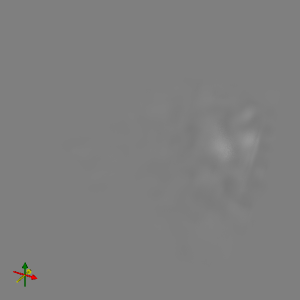
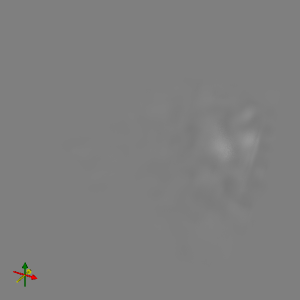

<IPython.core.display.Javascript object>

In [33]:
view(reg_diff)

In [34]:
print(reg_diff.min(), reg_diff.max())

-1625.67236328125 1135.97998046875


In [35]:
print(transform_moving_reg)

ParameterObject (00000212EDFECB50)
  RTTI typeinfo:   class elastix::ParameterObject
  Reference Count: 1
  Modified Time: 2408545
  Debug: Off
  Object Name: 
  Observers: 
    none
ParameterMap 0: 
  (CenterOfRotationPoint 76 45.5 50.5)
  (CompressResultImage "false")
  (ComputeZYX "false")
  (DefaultPixelValue 0)
  (Direction 1 0 0 0 1 0 0 0 1)
  (FinalBSplineInterpolationOrder 3)
  (FixedImageDimension 3)
  (FixedInternalImagePixelType "float")
  (HowToCombineTransforms "Compose")
  (Index 0 0 0)
  (InitialTransformParametersFileName "NoInitialTransform")
  (MovingImageDimension 3)
  (MovingInternalImagePixelType "float")
  (NumberOfParameters 6)
  (Origin 0 0 0)
  (ResampleInterpolator "FinalBSplineInterpolator")
  (Resampler "DefaultResampler")
  (ResultImageFormat "nii")
  (ResultImagePixelType "float")
  (Size 153 92 102)
  (Spacing 1 1 1)
  (Transform "EulerTransform")
  (TransformParameters -0.000480709 -5.12974e-05 -0.000420927 0.0247075 0.0181589 0.0386689)
  (UseDirectionC